In [103]:
from IPython.display import display, Markdown
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', None)
df = pd.read_csv('results.csv')
df.head(1)

,id,submitdate,lastpage,startlanguage,seed,startdate,datestamp,consortium[berd],consortium[daphne4nfdi],consortium[dataplant],...,metadata[other],ontologies,sourcecode[none],sourcecode[private],sourcecode[gitlab],sourcecode[github],sourcecode[unsure],sourcecode[other],forward,contact
0,3,NaN,NaN,en,1373688864,2025-03-03 10:24:40,2025-03-03 10:24:40,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df["startdate"] = pd.to_datetime(df["startdate"]).dt.date
date_series = df["startdate"].dropna()
mindate = date_series.min()
maxdate = date_series.max()
display("The survey responses were submitted between "+mindate.strftime('%d %B %Y')+" and "+maxdate.strftime('%d %B %Y')+".")


'The survey responses were submitted between 03 March 2025 and 24 March 2025.'

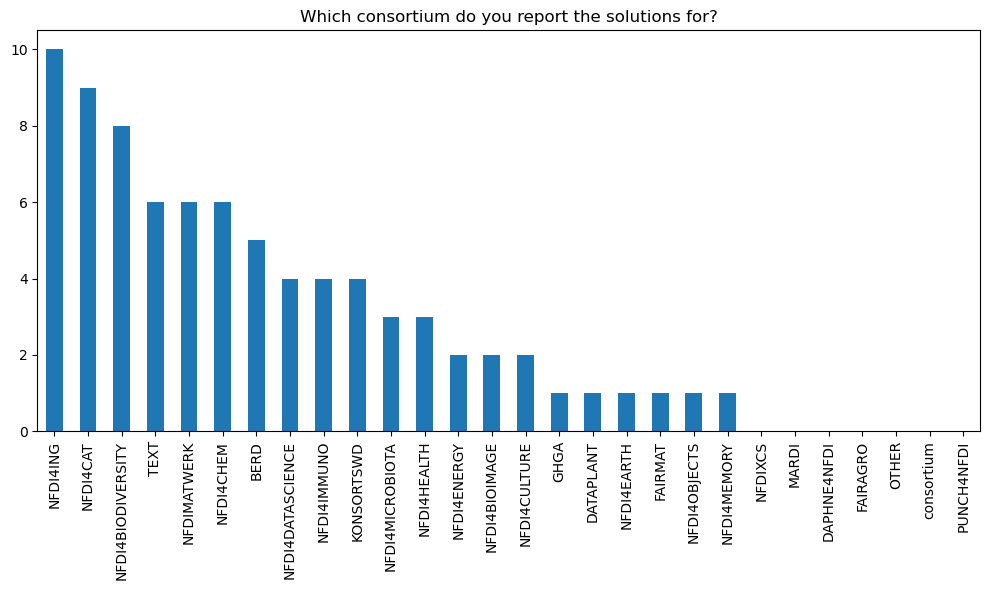

In [112]:
def col_count(prefix,title):
    cols = {col for col in df.columns if isinstance(col, str) and col.startswith(prefix)}
    counts = {}
    df[prefix] = [set() for _ in range(len(df))]
    aggregate = df[prefix]
    for col in cols:
            # string type columns are mistakenly recognized as objects 
            df[col] = df[col].fillna('').astype(str)
            new_col_name = re.sub(prefix+r"\[(.*)\]", lambda m: m.group(1).upper(), col)
            counts[new_col_name] = int((df[col] == 'Y').sum())
            named = df[col].replace('Y', new_col_name)
            for index, _value in named.items():
                name = named.at[index]
                if name:
                     if not isinstance(name,str): 
                        display("Warning: name is not a string value : "+str(name))
         
            if new_col_name == 'OTHER':
                continue
            for index, _value in aggregate.items():
                cons = named.at[index]
                if cons:
                     aggregate.at[index].add(cons)
    #display(aggregate)
    sorted_counts  = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
    #display(sorted_counts)
    pd.Series(sorted_counts).plot(kind='bar', figsize=(10, 6), rot=90, title=title)
    plt.tight_layout()
    plt.show()
    return sorted_counts

cons_count = col_count("consortium","Which consortium do you report the solutions for?")



def col_count_normalize(prefix,title):
    cols = {col for col in df.columns if isinstance(col, str) and col.startswith(prefix)}
    counts = {}
    for col in cols:
            new_col_name = re.sub(prefix+r"\[(.*)\]", lambda m: m.group(1).upper(), col)
            display(df[col] == 'Y')

#col_count_normalize("consortium","Normalize test")

{'MANAGE': 35,
 'RESEARCHER': 33,
 'DEVELOPER': 25,
 'ADMINISTRATOR': 10,
 'STEWARD': 6,
 'UNSURE': 3,
 'OTHER': 0}

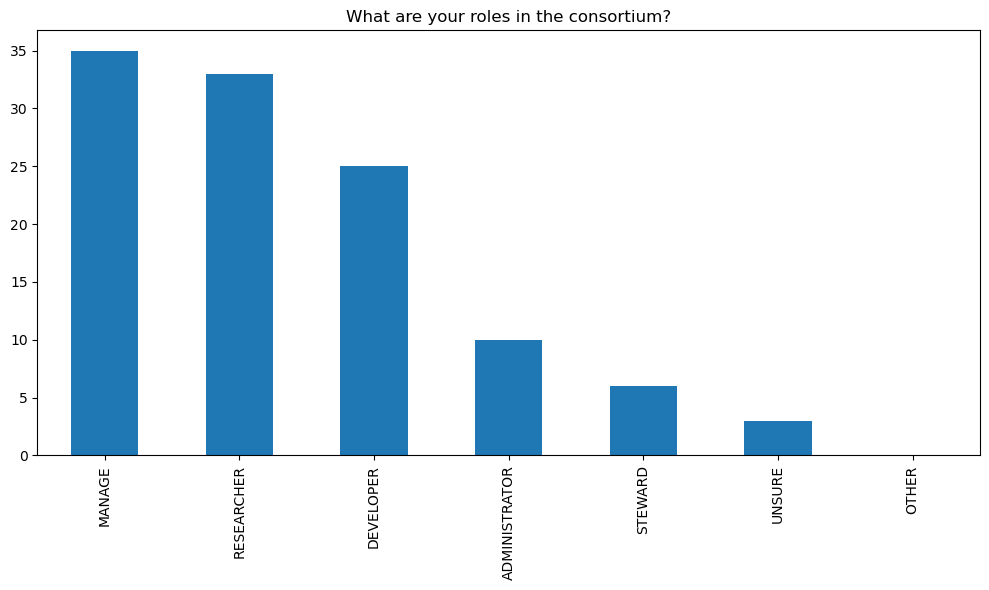

{'MANAGE': 35,
 'RESEARCHER': 33,
 'DEVELOPER': 25,
 'ADMINISTRATOR': 10,
 'STEWARD': 6,
 'UNSURE': 3,
 'OTHER': 0}

In [5]:
col_count("role","What are your roles in the consortium?")

In [114]:
#col_count_normalize("role","What are your roles in the consortium?")

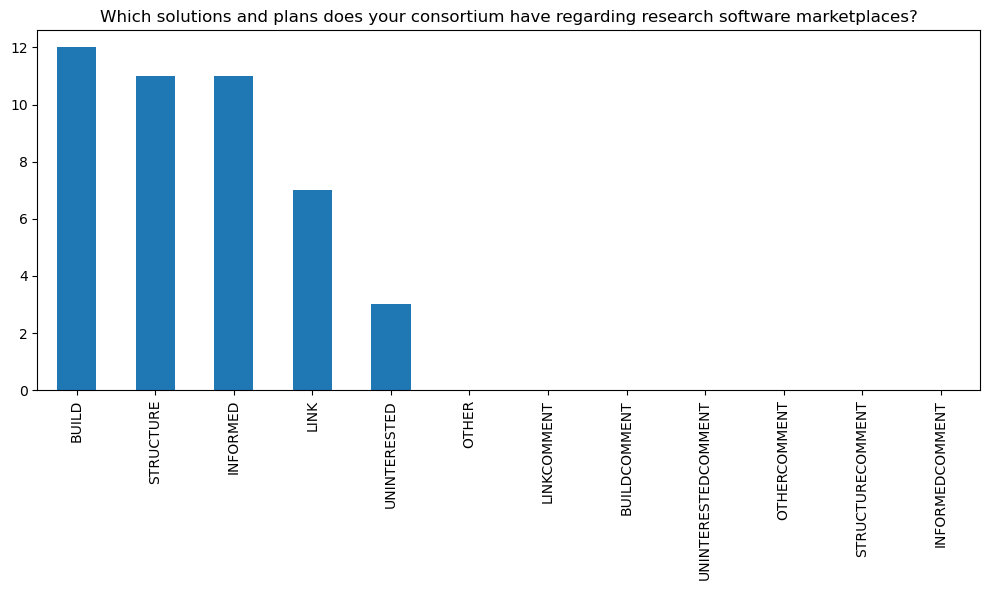

{'BUILD': 12,
 'STRUCTURE': 11,
 'INFORMED': 11,
 'LINK': 7,
 'UNINTERESTED': 3,
 'OTHER': 0,
 'LINKCOMMENT': 0,
 'BUILDCOMMENT': 0,
 'UNINTERESTEDCOMMENT': 0,
 'OTHERCOMMENT': 0,
 'STRUCTURECOMMENT': 0,
 'INFORMEDCOMMENT': 0}

In [115]:
col_count("solutions","Which solutions and plans does your consortium have regarding research software marketplaces?")

{'HOPE': 17, 'WE': 14, 'COMMUNITY': 14, 'NONE': 6, 'OTHER': 0}

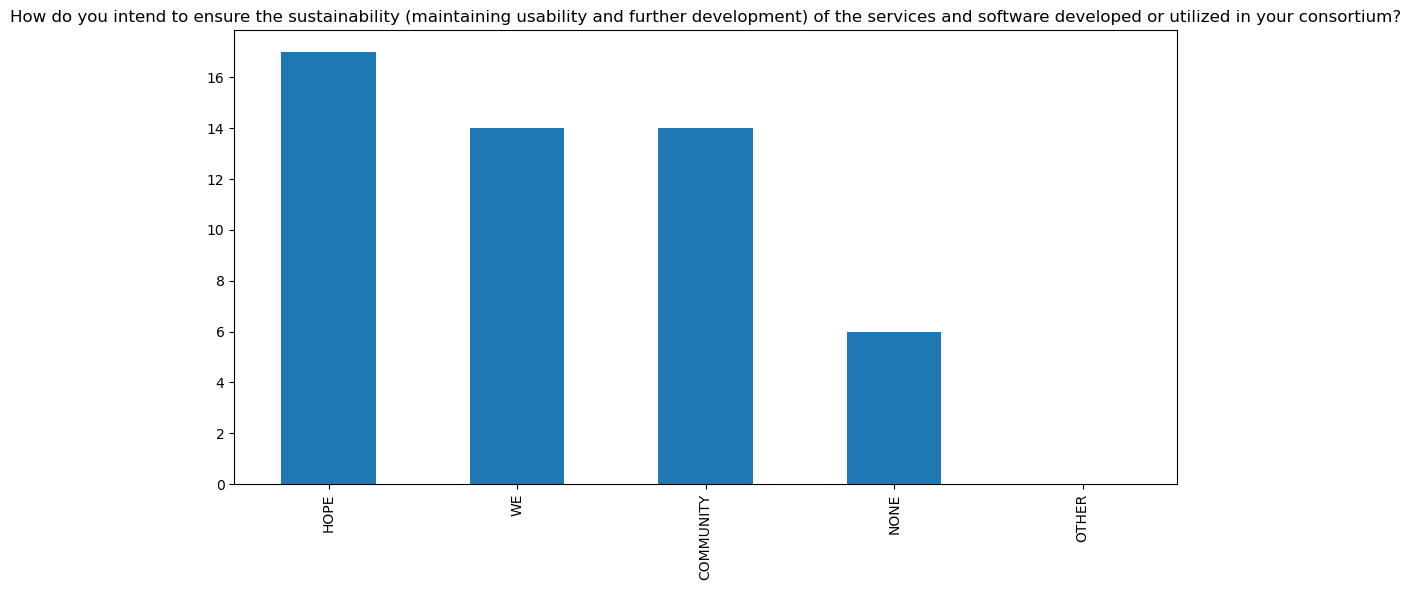

{'HOPE': 17, 'WE': 14, 'COMMUNITY': 14, 'NONE': 6, 'OTHER': 0}

In [8]:
col_count("sustain","How do you intend to ensure the sustainability (maintaining usability and further development) of the services and software developed or utilized in your consortium?")

{'PUBLICATION': 26, 'WEBPAGE': 22, 'SOCIALMEDIA': 15, 'OTHER': 0}

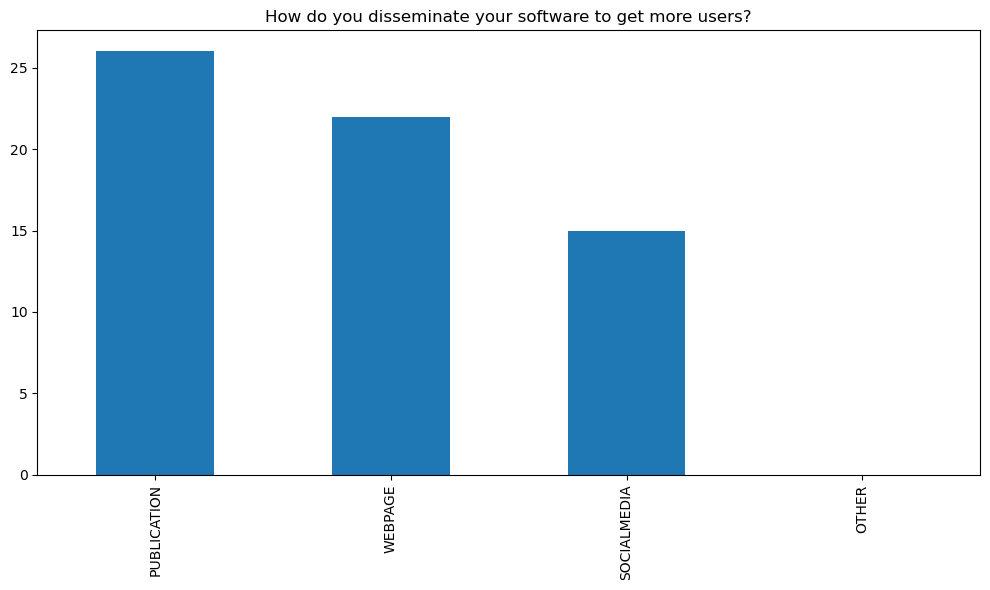

{'PUBLICATION': 26, 'WEBPAGE': 22, 'SOCIALMEDIA': 15, 'OTHER': 0}

In [9]:
col_count("disseminate","How do you disseminate your software to get more users?")

{'CITATIONCFF': 11, 'CODEMETA': 7, 'ZENODOJSON': 5, 'OTHER': 0}

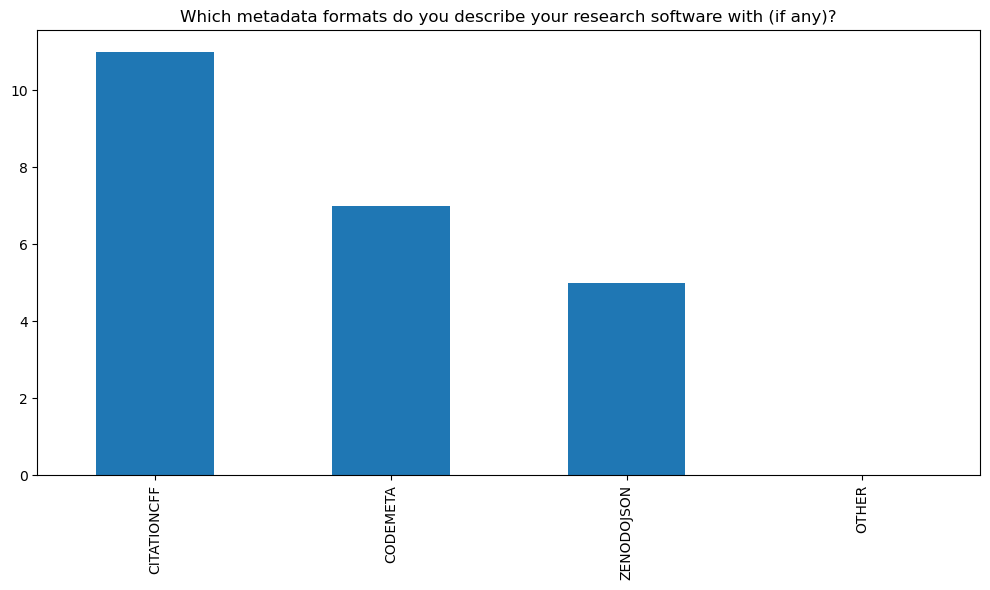

{'CITATIONCFF': 11, 'CODEMETA': 7, 'ZENODOJSON': 5, 'OTHER': 0}

In [10]:
col_count("metadata","Which metadata formats do you describe your research software with (if any)?")

{'GITHUB': 27, 'GITLAB': 20, 'PRIVATE': 4, 'NONE': 3, 'UNSURE': 1, 'OTHER': 0}

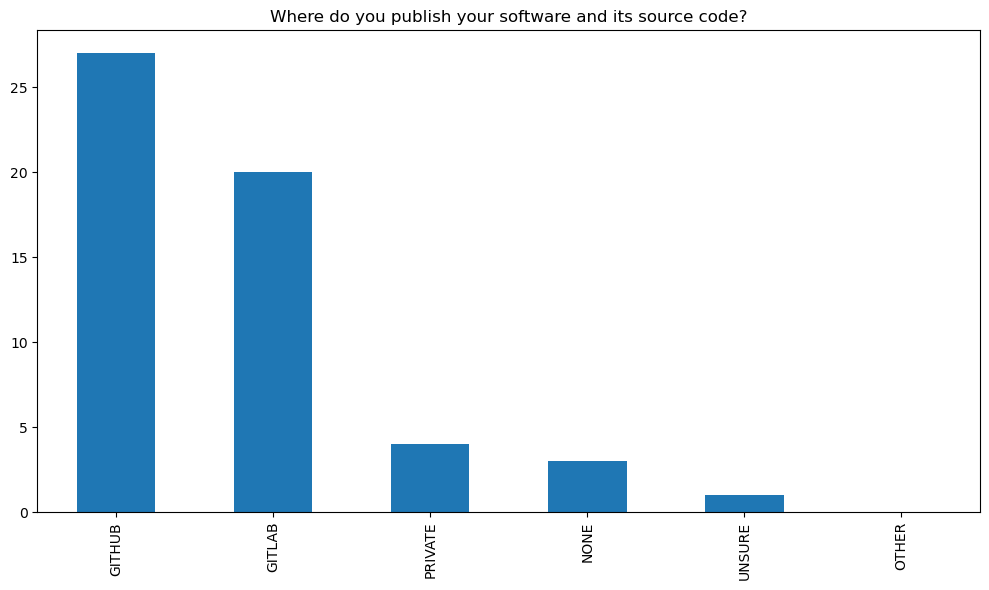

{'GITHUB': 27, 'GITLAB': 20, 'PRIVATE': 4, 'NONE': 3, 'UNSURE': 1, 'OTHER': 0}

In [11]:
col_count("sourcecode","Where do you publish your software and its source code?")

The problem with all those answers is that they are strongly biased by different participation ranging from 0 to 11 answers per consortium.
Thus we also look into the normalized values.
Ideally, there should be identical answers within each consortium but we suspect this won't be the case in practise, so we also look at the differences.
However the non-normalized values also shouldn't be discounted because if we assume participation is correlated with consortium size (or expressed in another way the probability of answering is not correlated by the consortium), then we can just treat the non-normalized values as samples from the whole of NFDI and the answers as based on the individual practises.
For example, if Persons A and B both belong to consortium C, and A answers GitHub and B answers GitLab to the source code question, then this doesn't need to mean that one got the answer wrong, just that there is no single answer that is valid for all people in that consortium.